In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
with open("Results/Entropy/fig4c-58_cliques.pkl", "rb") as f:
    data = pickle.load(f)
orig_red_mean_for_each_component = data["orig_red_mean_for_each_component"]
del_red_mean_for_each_component = data["del_red_mean_for_each_component"]
orig_syn_mean_for_each_component = data["orig_syn_mean_for_each_component"]
del_syn_mean_for_each_component = data["del_syn_mean_for_each_component"]

In [3]:
rmse_all = []
for i in range(0, 10, 1):
    with open(f"Results/Evaluation_Data/fhn_d005-o3n-58clqs_onecompdel_29.03.2024/{i}.pickle", "rb") as infile:
        data = pickle.load(infile)
    pred = data['predictions_all_TEST'][0, :, 0]
    true = data['truths_all_TEST'][0, :, 0]
    rmse = mean_squared_error(true, pred, squared=False)
    rmse_all.append(rmse)

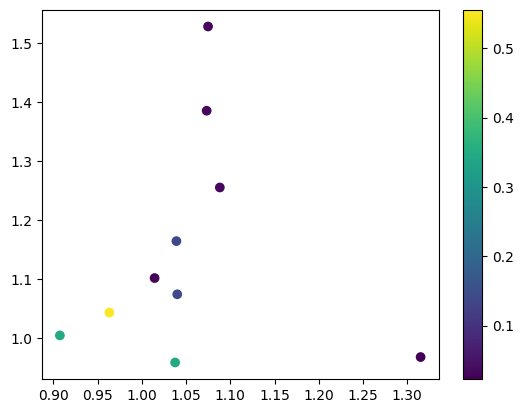

In [4]:
plt.scatter(orig_red_mean_for_each_component/del_red_mean_for_each_component,
            orig_syn_mean_for_each_component/del_syn_mean_for_each_component, c=rmse_all)
plt.colorbar()

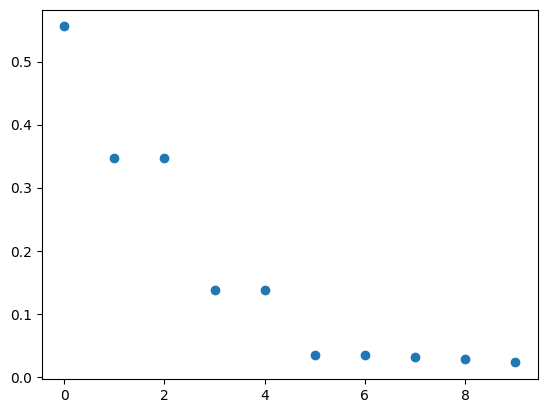

In [5]:
plt.plot(np.flip(np.sort(rmse_all)), "o")